In [60]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Sales price prediction/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df=df.iloc[:,1:]

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Analysis

<Axes: xlabel='Sales', ylabel='Radio'>

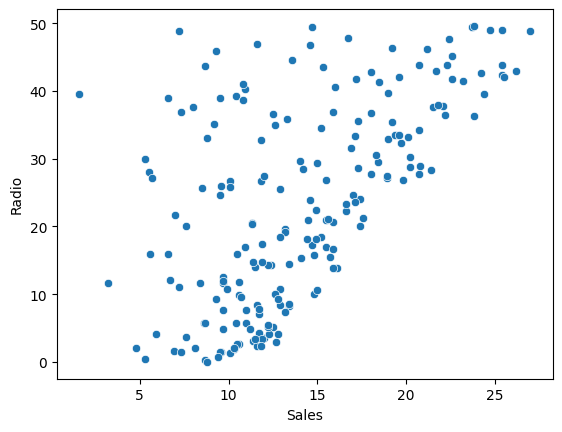

In [29]:
sns.scatterplot(x=df['Sales'],y=df['Radio'])

<Axes: xlabel='Sales', ylabel='TV'>

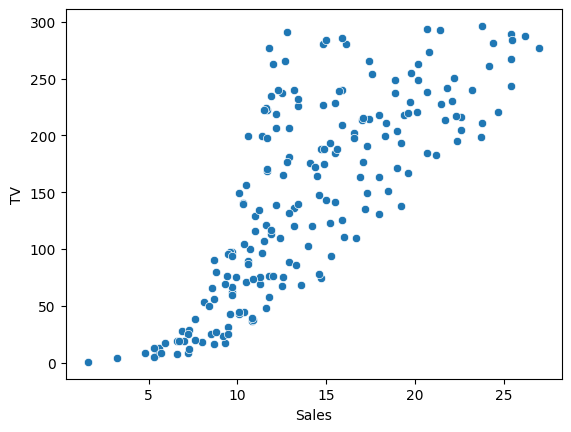

In [30]:
sns.scatterplot(x=df['Sales'],y=df['TV'])

<Axes: xlabel='Newspaper', ylabel='Radio'>

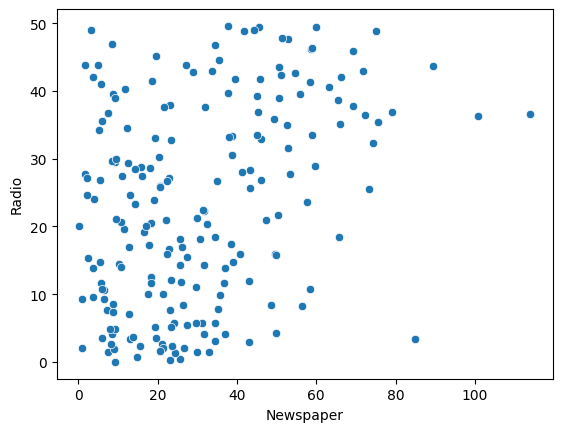

In [31]:
sns.scatterplot(x=df['Newspaper'],y=df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Radio'>

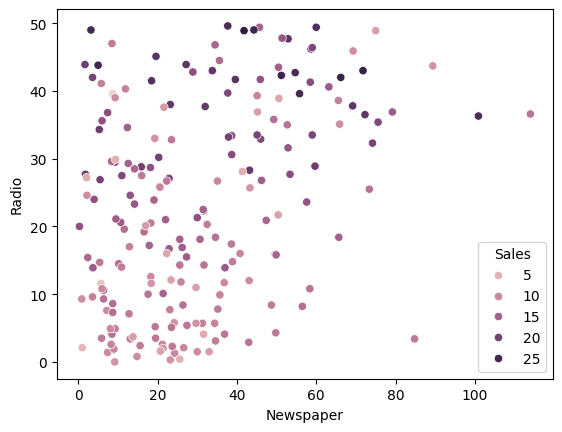

In [33]:
sns.scatterplot(x=df['Newspaper'],y=df['Radio'],hue=df['Sales'])

Splitting of data into test and train

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop(['Sales'],axis=1)
Y=df['Sales']

In [44]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [48]:
X_train

,TV,Radio,Newspaper
138,43.0,25.9,20.5
54,262.7,28.8,15.9
41,177.0,33.4,38.7
120,141.3,26.8,46.2
119,19.4,16.0,22.3
...,...,...,...
179,165.6,10.0,17.6
94,107.4,14.0,10.9
51,100.4,9.6,3.6
153,171.3,39.7,37.7


In [49]:
X_test

,TV,Radio,Newspaper
42,293.6,27.7,1.8
92,217.7,33.5,59.0
21,237.4,5.1,23.5
151,121.0,8.4,48.7
60,53.5,2.0,21.4
82,75.3,20.3,32.5
172,19.6,20.1,17.0
133,219.8,33.5,45.1
140,73.4,17.0,12.9
43,206.9,8.4,26.4


In [50]:
Y_train

138     9.6
54     20.2
41     17.1
120    15.5
119     6.6
       ... 
179    12.6
94     11.5
51     10.7
153    19.0
193    19.6
Name: Sales, Length: 180, dtype: float64

In [51]:
Y_test

42     20.7
92     19.4
21     12.5
151    11.6
60      8.1
82     11.3
172     7.6
133    19.6
140    10.9
43     12.9
84     21.7
15     22.4
6      11.8
48     14.8
25     12.0
124    19.7
184    17.6
91      7.3
117     9.4
126     6.6
Name: Sales, dtype: float64

Model Training

Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
clf=LinearRegression()

In [54]:
clf.fit(X_train,Y_train)

LinearRegression()

Now we are Evaluating the model by predicting the values after the training of the model

In [56]:
yPred_val=clf.predict(X_test)

In [57]:
yPred_val

array([21.75070748, 19.22335319, 14.79131464,  9.94269763,  5.61053509,
       10.0956909 ,  7.47752707, 19.34196762,  9.40773789, 13.98977541,
       20.87220119, 20.89270476, 11.65607049, 16.31213136, 15.68435329,
       19.5240113 , 18.63123657,  4.33467671,  6.46202876, 10.454518  ])

In [58]:
Y_test

42     20.7
92     19.4
21     12.5
151    11.6
60      8.1
82     11.3
172     7.6
133    19.6
140    10.9
43     12.9
84     21.7
15     22.4
6      11.8
48     14.8
25     12.0
124    19.7
184    17.6
91      7.3
117     9.4
126     6.6
Name: Sales, dtype: float64

In [61]:
#R squared Error
error_score=metrics.r2_score(Y_test,yPred_val)
print("R squared Error:",error_score)

R squared Error: 0.8586004234734124


Visualization of the Actual values vs Predicted values.

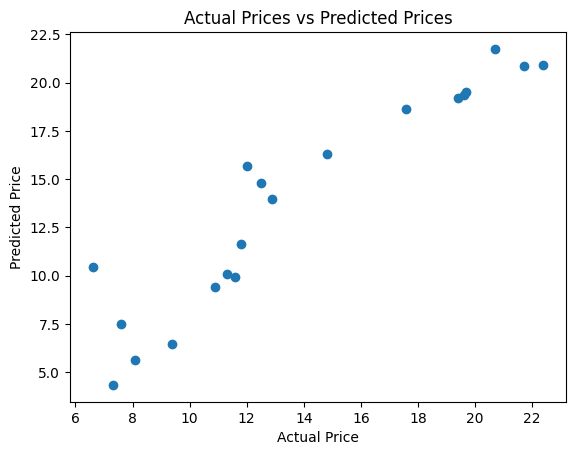

In [63]:
plt.scatter(Y_test,yPred_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()